Data visualization of the COVID-19 virus based on the New York Times data set

In [1]:
import pandas as pd

In [2]:
counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
df = pd.read_csv(counties_url)
cal_counties_df = df[df['state'] == 'California']
ny_counties_df = df[df['state'] == 'New York']

In [3]:
states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(states_url)
ny_df = df[df['state'] == 'New York']
cal_df = df[df['state'] == 'California']

In [4]:
cal_df['date'].min()

'2020-01-25'

In [5]:
ny_df['date'].min()

'2020-03-01'

In [6]:
ny_add_dates = pd.date_range(start=cal_df['date'].min(), end=ny_df['date'].min()).sort_values(ascending=True)[0:-1]
ny_append_list = []
for dt in ny_add_dates:
    ny_append_list.append([dt.strftime("%Y-%m-%d"), 'New York', 36, 0, 0])
new_ny = pd.DataFrame(
    ny_append_list,
    columns = ["date", "state", "fips", "cases", "deaths"])
ny_extended_df = pd.concat([ny_df, new_ny]).sort_values(by='date')

In [7]:
ny_extended_df

,date,state,fips,cases,deaths
0,2020-01-25,New York,36,0,0
1,2020-01-26,New York,36,0,0
2,2020-01-27,New York,36,0,0
3,2020-01-28,New York,36,0,0
4,2020-01-29,New York,36,0,0
5,2020-01-30,New York,36,0,0
6,2020-01-31,New York,36,0,0
7,2020-02-01,New York,36,0,0
8,2020-02-02,New York,36,0,0
9,2020-02-03,New York,36,0,0


In [8]:
import matplotlib.pyplot as plt
def plot_locs(loc1, loc2, loc1_name, loc2_name, col_name):
    ax = loc1.plot(x='date', y=col_name, label=loc1_name, kind='line')
    loc2.plot(ax=ax, x='date', y=col_name, label=loc2_name, kind='line')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()

plot_locs(cal_df, ny_extended_df, 'CA', 'NY', 'cases')

<Figure size 640x480 with 1 Axes>

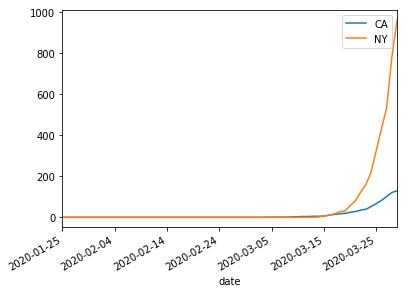

In [9]:
plot_locs(cal_df, ny_extended_df, 'CA', 'NY', 'deaths')

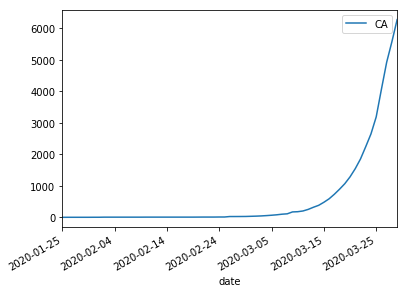

In [10]:
def plot_loc(loc_df, name, col_name):
    fig, ax = plt.subplots()
    loc_df.plot(ax=ax, x='date', y=col_name, label=name, kind = 'line')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.show()

plot_loc(cal_df, 'CA', 'cases')

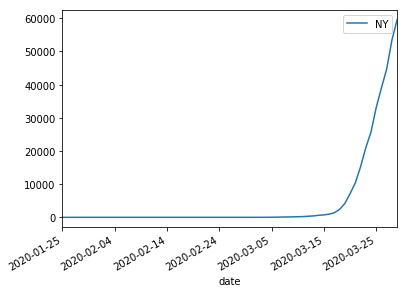

In [11]:
plot_loc(ny_extended_df, 'NY', 'cases')

In [12]:
nyc_df = ny_counties_df[ny_counties_df['county']=='New York City'].sort_values(by='date')
nyc_add_dates = pd.date_range(start=cal_df['date'].min(), end=nyc_df['date'].min()).sort_values(ascending=True)[0:-1]
nyc_append_list = []
for dt in nyc_add_dates:
    nyc_append_list.append([dt.strftime("%Y-%m-%d"),'New York City', 'New York', 36, 0, 0])
new_nyc = pd.DataFrame(
    nyc_append_list,
    columns = ["date", "county", "state", "fips", "cases", "deaths"])
nyc_extended_df = pd.concat([nyc_df, new_nyc]).sort_values(by='date')

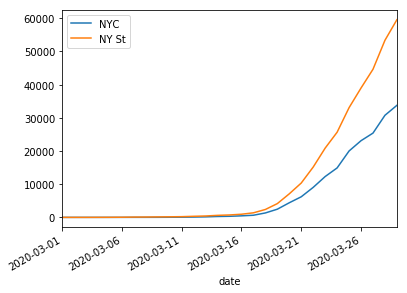

In [13]:
plot_locs(nyc_df, ny_df, 'NYC', 'NY St', 'cases')

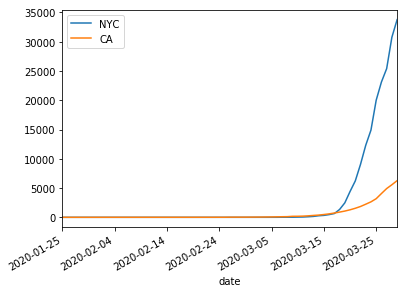

In [14]:
plot_locs(nyc_extended_df, cal_df, 'NYC', 'CA', 'cases')

In [15]:
alameda_df = cal_counties_df[cal_counties_df['county']=='Alameda']
cc_df = cal_counties_df[cal_counties_df['county']=='Contra Costa']
marin_df = cal_counties_df[cal_counties_df['county']=='Marin']
napa_df = cal_counties_df[cal_counties_df['county']=='Napa']
sc_df  = cal_counties_df[cal_counties_df['county']=='Santa Clara']
sf_df  = cal_counties_df[cal_counties_df['county']=='San Francisco']
sm_df  = cal_counties_df[cal_counties_df['county']=='San Mateo']

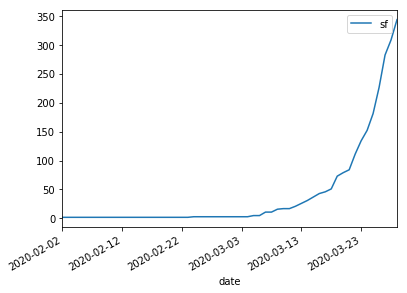

In [16]:
plot_loc(sf_df, 'sf', 'cases')

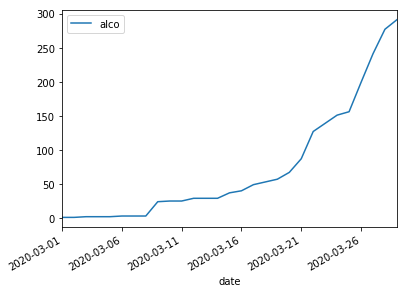

In [17]:
plot_loc(alameda_df, 'alco', 'cases')

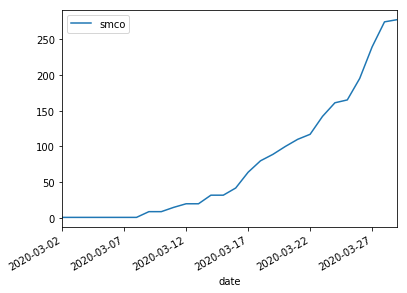

In [18]:
plot_loc(sm_df, 'smco', 'cases')

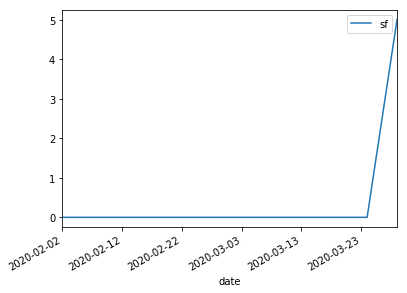

In [19]:
plot_loc(sf_df, 'sf', 'deaths')

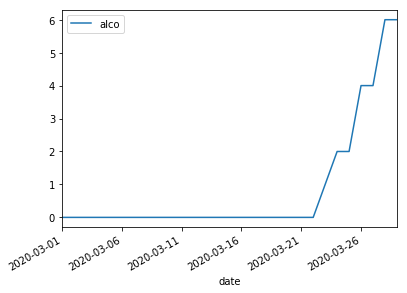

In [20]:
plot_loc(alameda_df, 'alco', 'deaths')

In [21]:
def calc_rate(df, col, rate_col):
    df = df.sort_values(by='date').reset_index()
    df[rate_col] = 0
    for i in range(1, len(df)):
        df.loc[i, rate_col] = (df.loc[i, col] - df.loc[i-1, col]) / df.loc[i-1, col]
    return df

ny_case_rate = calc_rate(ny_extended_df, 'cases', 'cases_rate')
ny_case_rate

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in long_scalars
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in long_scalars


,index,date,state,fips,cases,deaths,cases_rate
0,0,2020-01-25,New York,36,0,0,0.000000
1,1,2020-01-26,New York,36,0,0,NaN
2,2,2020-01-27,New York,36,0,0,NaN
3,3,2020-01-28,New York,36,0,0,NaN
4,4,2020-01-29,New York,36,0,0,NaN
5,5,2020-01-30,New York,36,0,0,NaN
6,6,2020-01-31,New York,36,0,0,NaN
7,7,2020-02-01,New York,36,0,0,NaN
8,8,2020-02-02,New York,36,0,0,NaN
9,9,2020-02-03,New York,36,0,0,NaN


In [22]:
cal_cases_rate = calc_rate(cal_df, 'cases', 'cases_rate')
cal_cases_rate

,index,date,state,fips,cases,deaths,cases_rate
0,5,2020-01-25,California,6,1,0,0.000000
1,9,2020-01-26,California,6,2,0,1.000000
2,13,2020-01-27,California,6,2,0,0.000000
3,17,2020-01-28,California,6,2,0,0.000000
4,21,2020-01-29,California,6,2,0,0.000000
5,25,2020-01-30,California,6,2,0,0.000000
6,29,2020-01-31,California,6,3,0,0.500000
7,33,2020-02-01,California,6,3,0,0.000000
8,38,2020-02-02,California,6,6,0,1.000000
9,43,2020-02-03,California,6,6,0,0.000000


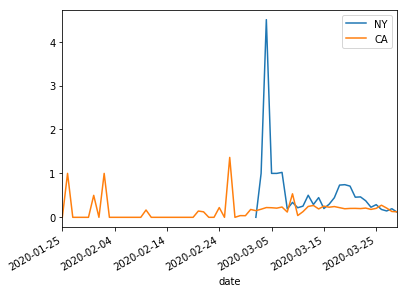

In [23]:
plot_locs(ny_case_rate, cal_cases_rate, 'NY', 'CA', 'cases_rate')

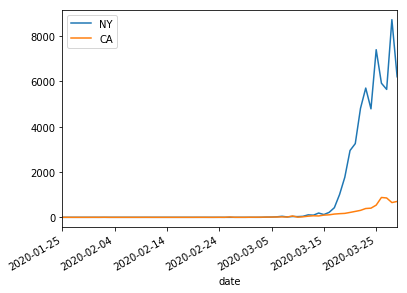

In [24]:
def calc_new(df, col, new_col):
    df = df.sort_values(by='date').reset_index()
    df[new_col] = 0
    for i in range(1, len(df)):
        df.loc[i, new_col] = df.loc[i, col] - df.loc[i-1, col]
    return df

cal_new = calc_new(cal_df, 'cases', 'new_cases')
ny_new = calc_new(ny_extended_df, 'cases', 'new_cases')

plot_locs(ny_new, cal_new, 'NY', 'CA', 'new_cases')